In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from cycler import cycler
from scipy.integrate import quadrature

from matplotlib import animation, rc
rc('animation', html='html5')

rc('lines', linewidth=2, color='b', markersize=12)

rc('axes', titlesize=20, labelsize=16, xmargin=0.05, ymargin=0.05, linewidth=2)
rc('axes.spines', top=False, right=False)

rc('xtick', labelsize=13)
rc('xtick.major', size=8, width=2)

rc('ytick', labelsize=13)
rc('ytick.major', size=8, width=2)

rc('legend', fontsize=14)

In [3]:
def get_data(filename):
    A = np.loadtxt(filename, delimiter=',')
    xvals = A[:, 0]
    yvals = A[:, 1]
    return xvals, yvals

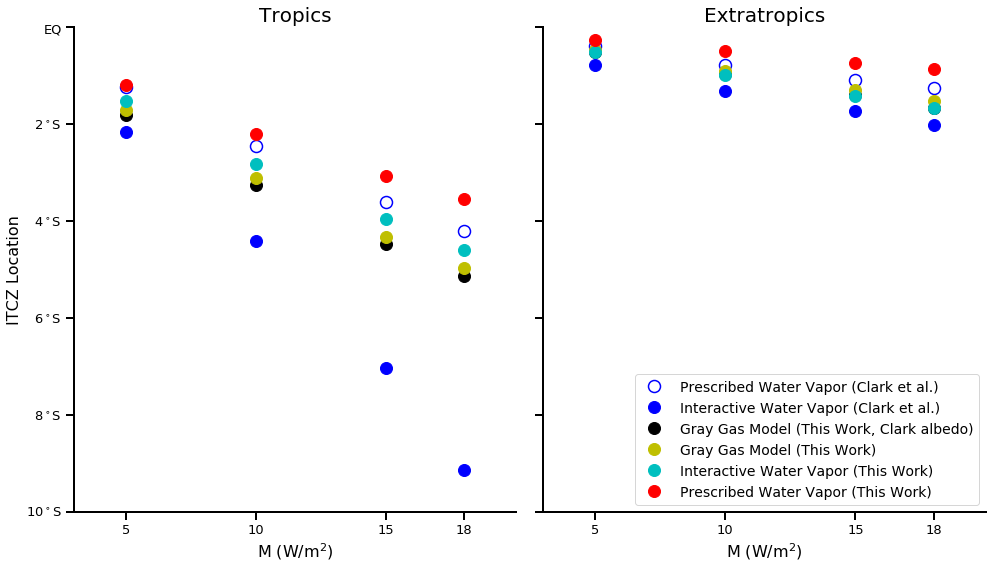

In [4]:
### PERTURBATION COMPARISONS

scaling = 0.64 

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,8), sharey=True)


xvals, yvals = get_data('tropics_perturbations_clark.dat')
ax1.plot(xvals[:4], yvals[:4], 'bo', label='Prescribed Water Vapor (Clark et al.)',
         markerfacecolor='w', markeredgewidth=1.5)
ax1.plot(xvals[4:], yvals[4:], 'bo', label='Interactive Water Vapor (Clark et al.)')

xvals, yvals = get_data('tropics_perturbations_gray_clark_alb.dat')
ax1.plot(xvals, scaling*yvals, 'ko', label='Gray Gas Model (This Work, Clark albedo)')

xvals, yvals = get_data('tropics_perturbations_gray.dat')
ax1.plot(xvals, scaling*yvals, 'yo', label='Gray Gas Model (This Work)')

xvals, yvals = get_data('tropics_perturbations_CliMT_qfeedback.dat')
ax1.plot(xvals, scaling*yvals, 'co', label='Interactive Water Vapor (This Work)')

xvals, yvals = get_data('tropics_perturbations_CliMT_qprescribed.dat')
ax1.plot(xvals, scaling*yvals, 'ro', label='Prescribed Water Vapor (This Work)')

ax1.set_xlim(3, 20)
ax1.set_xticks([5, 10, 15, 18])
ax1.set_ylim(10, 0)
# ax1.legend(loc='lower left')
ax1.set_yticklabels(['EQ', '2$^\\circ$S', '4$^\\circ$S', '6$^\\circ$S', '8$^\\circ$S', '10$^\\circ$S'])
ax1.set_title('Tropics')
ax1.set_xlabel('M (W/m$^2$)')
ax1.set_ylabel('ITCZ Location')

#new pts
# ax1.plot([5, 10, 15, 18], [1.38, 2.60, 3.73, 4.36], 'go')

xvals, yvals = get_data('extratropics_perturbations_clark.dat')
ax2.plot(xvals[:4], yvals[:4], 'bo', label='Prescribed Water Vapor (Clark et al.)', markerfacecolor='w', markeredgewidth=1.5)
ax2.plot(xvals[4:], yvals[4:], 'bo', label='Interactive Water Vapor (Clark et al.)')

xvals, yvals = get_data('extratropics_perturbations_gray_clark_alb.dat')
ax2.plot(xvals, scaling*yvals, 'ko', label='Gray Gas Model (This Work, Clark albedo)')

xvals, yvals = get_data('extratropics_perturbations_gray.dat')
ax2.plot(xvals, scaling*yvals, 'yo', label='Gray Gas Model (This Work)')

xvals, yvals = get_data('extratropics_perturbations_CliMT_qfeedback.dat')
ax2.plot(xvals, scaling*yvals, 'co', label='Interactive Water Vapor (This Work)')

xvals, yvals = get_data('extratropics_perturbations_CliMT_qprescribed.dat')
ax2.plot(xvals, scaling*yvals, 'ro', label='Prescribed Water Vapor (This Work)')

ax2.set_xlim(3, 20)
ax2.set_xticks([5, 10, 15, 18])
ax2.legend(loc='lower right')
ax2.set_title('Extratropics')
ax2.set_xlabel('M (W/m$^2$)')

plt.tight_layout()

# plt.savefig('ITCZ_perturbations.png', dpi=200)

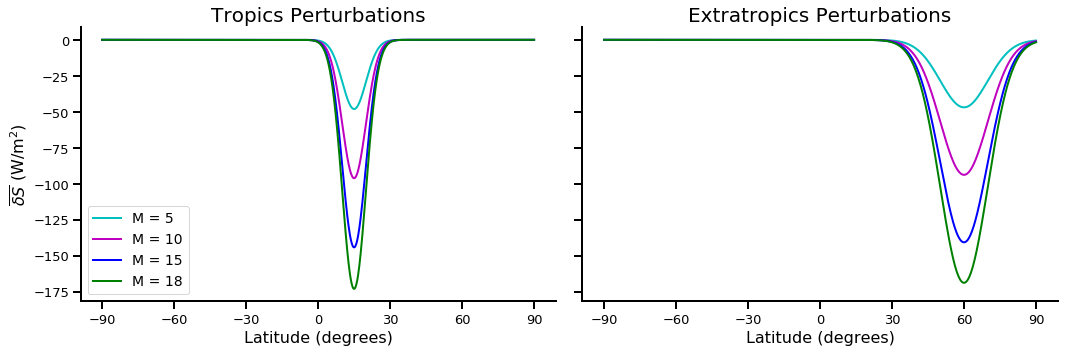

In [10]:
get_S_control = lambda lat: S0*np.cos(np.deg2rad(lat))/np.pi
lat0 = 15
sigma = 4.94
#     lat0 = 60
#     sigma = 9.89
func = lambda y: 0.5 * np.exp(-(y - np.deg2rad(lat0))**2 / (2*np.deg2rad(sigma)**2)) * np.cos(y)
M0, er = quadrature(func, -np.pi/2, np.pi/2, tol=1e-16, rtol=1e-16, maxiter=1000)
get_dS = lambda lat: - M/M0 * np.exp(-(lat - lat0)**2 / (2*sigma**2))
get_S = lambda lat: get_S_control(lat) + get_dS(lat)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5), sharey=True)

ax1.set_xlabel('Latitude (degrees)')
ax2.set_xlabel('Latitude (degrees)')
ax1.set_ylabel('$\\overline{\\delta S}$ (W/m$^2$)')
ax1.set_xticks([-90, -60, -30, 0, 30, 60, 90])
ax2.set_xticks([-90, -60, -30, 0, 30, 60, 90])
ax1.set_title('Tropics Perturbations')
ax2.set_title('Extratropics Perturbations')
color_cycle = ['c', 'm', 'b', 'g']
ax1.set_prop_cycle(cycler('color', color_cycle))
ax2.set_prop_cycle(cycler('color', color_cycle))

lats = np.linspace(-90, 90, 1000)

for M in [5, 10, 15, 18]:
    sigma = 4.94; lat0 = 15
    func = lambda y: 0.5 * np.exp(-(y - np.deg2rad(lat0))**2 / (2*np.deg2rad(sigma)**2)) * np.cos(y)
    M0, er = quadrature(func, -np.pi/2, np.pi/2, tol=1e-16, rtol=1e-16, maxiter=1000)
    get_dS = lambda lat: - M/M0 * np.exp(-(lat - lat0)**2 / (2*sigma**2))
    get_S = lambda lat: get_S_control(lat) + get_dS(lat)
    ax1.plot(lats, get_dS(lats), label='M = {}'.format(M))
    
    sigma = 9.89; lat0 = 60
    func = lambda y: 0.5 * np.exp(-(y - np.deg2rad(lat0))**2 / (2*np.deg2rad(sigma)**2)) * np.cos(y)
    M0, er = quadrature(func, -np.pi/2, np.pi/2, tol=1e-16, rtol=1e-16, maxiter=1000)
    get_dS = lambda lat: - M/M0 * np.exp(-(lat - lat0)**2 / (2*sigma**2))
    get_S = lambda lat: get_S_control(lat) + get_dS(lat)
    ax2.plot(lats, get_dS(lats), label='M = {}'.format(M))

ax1.legend()
# ax2.legend()

plt.tight_layout()

# plt.savefig('gaussian_perturbs.png', dpi=200)